In [1]:
'''
Aerofit Example ->

Education | Gender | Income | Fitness | Usage | Product

"Product" -> Target
All other columns are features / attributes.

--------------------------------------------------

Fitness Example ->

Height | Weight | Fit?

"Fit?" -> Target
Height and Weight are both features.

We will not be able to make accurate prediction about "Fit?" using
Height / Weight individually.

We will derive a new feature called BMI.

BMI = weight (kg) / height ** 2 (m)
'''

'\nAerofit Example ->\n\nEducation | Gender | Income | Fitness | Usage | Product\n\n"Product" -> Target\nAll other columns are features / attributes.\n\n--------------------------------------------------\n\nFitness Example ->\n\nHeight | Weight | Fit?\n\n"Fit?" -> Target\nHeight and Weight are both features.\n\nWe will not be able to make accurate prediction about "Fit?" using\nHeight / Weight individually.\n\nWe will derive a new feature called BMI.\n\nBMI = weight (kg) / height ** 2 (m)\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("loan.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
'''
"Loan_Status" -> Target
Remaining Columns -> Features
'''

'\n"Loan_Status" -> Target\nRemaining Columns -> Features\n'

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [10]:
data = data.drop("Loan_ID", axis = 1)

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
'''
- There is a lot of variation in ApplicantIncome -> ($150, $81000)
- Most of the applicants (75%) have an income less than $6000
- A significant amount of coapplicants do not have an income.
- With the max value as $81000 and average around $5500, data seems skewed.
'''

'\n- There is a lot of variation in ApplicantIncome -> ($150, $81000)\n- Most of the applicants (75%) have an income less than $6000\n- A significant amount of coapplicants do not have an income.\n- With the max value as $81000 and average around $5500, data seems skewed.\n'

In [15]:
data.describe(include = ["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [16]:
'''
- Most of the applicants are Male. (489 / 601)
- Significant amount of applicants are married. (398 / 611)
.
.
.
'''

'\n- Most of the applicants are Male. (489 / 601)\n- Significant amount of applicants are married. (398 / 611)\n.\n.\n.\n'

In [17]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
cat_cols = data.dtypes == "object"

In [19]:
cat_cols

Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [20]:
cat_cols = list(cat_cols[cat_cols].index)

In [21]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [22]:
cat_cols.remove("Loan_Status")

In [23]:
num_cols = data.dtypes != "object"
num_cols = list(num_cols[num_cols].index)

In [24]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Skewness

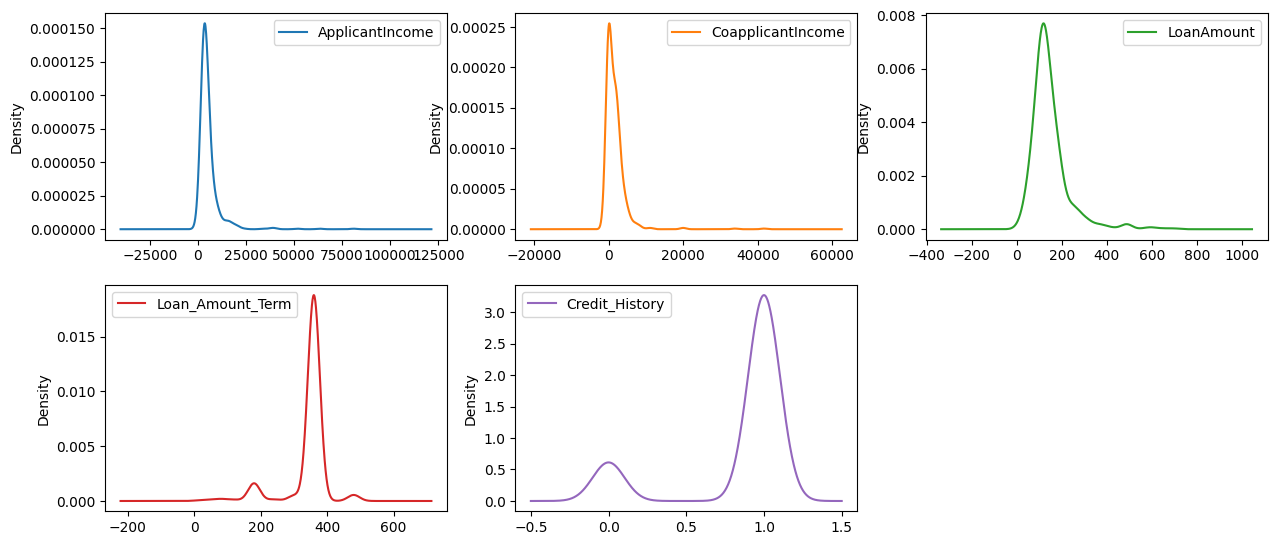

In [26]:
plt.rcParams["figure.figsize"] = [15, 10]
data.plot(kind = "density", subplots = True, layout = (3, 3), sharex = False)
plt.show()

In [28]:
print(data.skew(numeric_only = True))

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


# Kurtosis

In [29]:
'''
Positive Kurtosis (Leptokurtic)
Normal Distribution (Mesokurtic)
Negative Kurtosis (Platykurtic)
'''

'\nPositive Kurtosis (Leptokurtic)\nNormal Distribution (Mesokurtic)\nNegative Kurtosis (Platykurtic)\n'

In [31]:
data.kurt(numeric_only = True)

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

# Univariate Analysis

In [32]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

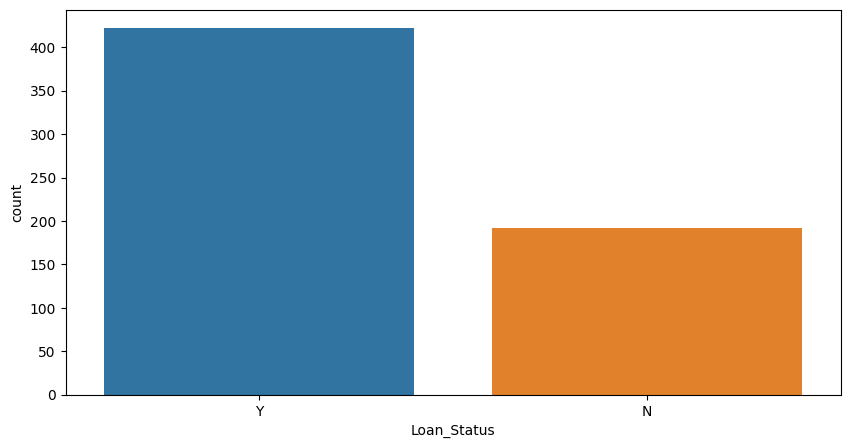

In [33]:
plt.rcParams["figure.figsize"] = [10,5]
sns.countplot(data = data, x = "Loan_Status")
plt.show()

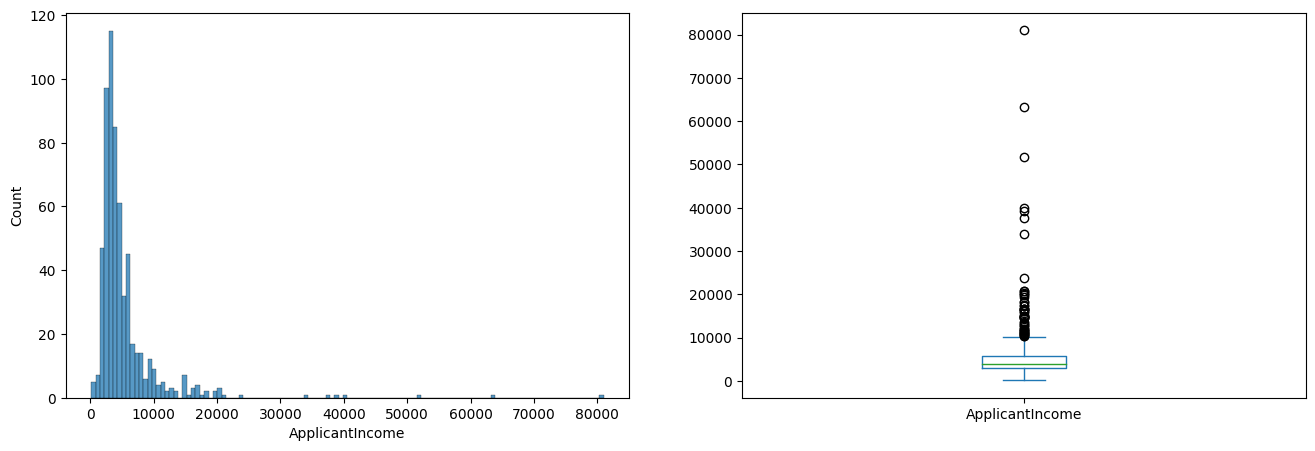

In [34]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize = (16, 5))

plt.show()

In [35]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [36]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"] == "Y"]["ApplicantIncome"]
b = data[data["Loan_Status"] == "N"]["ApplicantIncome"]

In [37]:
# H0: Loan Status is independent of Income
# Ha: Loan Status is dependent on Income

In [38]:
ttest_ind(a, b)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [39]:
'''
Extremely high P - Value -> Accept the Null Hypothesis.
Income does not play any role in determining the Loan Status.
'''

'\nExtremely high P - Value -> Accept the Null Hypothesis.\nIncome does not play any role in determining the Loan Status.\n'

# BINNING

In [40]:
# Conversion of continuous data into categorical data

In [43]:
bins = [0, 2500, 4000, 6000, 8000, 10000, 20000, 40000, 80000]
group_labels = ["Low", "Average", "Medium", "H1", "H2", "H3", "H4", "Very High"]

In [44]:
data["Income_Bin"] = pd.cut(data["ApplicantIncome"], bins, labels = group_labels)

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


In [46]:
pd.crosstab(data["Income_Bin"], data["Loan_Status"])

Loan_Status,N,Y
Income_Bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,0,2


In [47]:
from scipy.stats import chi2_contingency

In [48]:
val = pd.crosstab(data["Income_Bin"], data["Loan_Status"]).values

In [49]:
val

array([[ 34,  74],
       [ 67, 159],
       [ 45,  98],
       [ 20,  34],
       [  9,  22],
       [ 13,  27],
       [  3,   6],
       [  0,   2]])

In [50]:
# H0: Loan Status is independent of Income Bin
# Ha: Loan Status is dependent on Income Bin

In [52]:
chi2_contingency(val) # chi_stat, p_val, df, expected_values

(2.146634123226672,
 0.9512804301836162,
 7,
 array([[ 33.65089723,  74.34910277],
        [ 70.41761827, 155.58238173],
        [ 44.55628059,  98.44371941],
        [ 16.82544861,  37.17455139],
        [  9.65905383,  21.34094617],
        [ 12.46329527,  27.53670473],
        [  2.80424144,   6.19575856],
        [  0.62316476,   1.37683524]]))

In [54]:
'''
HOMEWORK - 

Try and do a similar analysis on TotalIncome. (ApplicantIncome + CoapplicantIncome)
'''

'\nHOMEWORK - \n\nTry and do a similar analysis on TotalIncome. (ApplicantIncome + CoapplicantIncome)\n'

In [ ]:
'''
You have a DataFrame named df with a column called 'age',
and you want to create bins for age groups such as
i) 'Young', - 0 to 30
ii) 'Middle-aged',- 30 to 60 and
iii) 'Senior'. - 60 to 100

Choose the correct option.

a)
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

b)
bins = [30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins, labels)

c)
age_bins = [0, 30, 60]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=labels)

d)
age_bins = [0, 30, 60, 100]
age_labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(age, bins=age_bins, labels=age_labels)
'''